In [1]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import scale 

from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score 

%matplotlib inline 

# Hierarchical [Agglomerative] clustering 

In [2]:
#reading wine data
wine=pd.read_csv('winequality-white.csv', delimiter=';')
wine.head()

#choosing 2 columns 
wine = wine[['sulphates','alcohol']]
wine.head()

wine.describe().T

#we need to scale the data because sulphates are in the range of 0 to 1 and alcohol has value of 10

#'scale' can also be used for standardization instead of using standard scaler
#just that the output of scale is a Matrix and we need to convert it back to dataframe 

wine_std = pd.DataFrame(scale(wine), columns=list(wine.columns))

#checking values in the scaked dataframe 
wine_std.describe().T

,count,mean,std,min,25%,50%,75%,max
sulphates,4898.0,-7.572999e-16,1.000102,-2.364709,-0.699710,-0.173921,0.527131,5.171602
alcohol,4898.0,-2.178784e-15,1.000102,-2.043297,-0.824276,-0.092863,0.719818,2.995326


In [3]:
#checking performance using clusters from 2 to 10, euclidean distance and ward linkage
for n_clusters in range(2,10):
    cls_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cls_lables=cls_model.fit_predict(wine_std)
    sil_avg = silhouette_score(wine_std, cls_lables, metric='euclidean')
    print(n_clusters, sil_avg)


2 0.3091095689547383
3 0.36507065689263013
4 0.36394118955693916
5 0.2849369402765109
6 0.28173689619112985
7 0.30584775050004287
8 0.29918403546397854
9 0.2931385252344828


In [4]:
#best silhouette index is for n=3
hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [5]:
#output
labels_hie_clus = hie_clus.fit_predict(wine_std)

In [6]:
#adding the labels as a new col to the dataframe 
wine['clusters_hie'] = labels_hie_clus

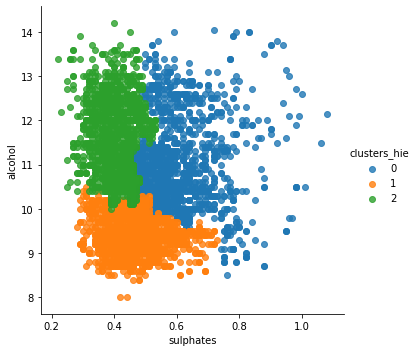

In [7]:
#viz to see how well the clusters have been formed 
sns.lmplot(fit_reg=False, x='sulphates', y='alcohol', data=wine, hue='clusters_hie')

# Kmeans clustering

In [8]:
#since we do not know the number of clusters to be formed 
#we will check with below mentioned values and choose the one that has highest silhouette score 
range_n_clusters = [2,3,4,5,6,8,9]

In [9]:
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std)
    
    print(k, silhouette_score(wine_std, kmeans.labels_))

2 0.3741276150143867
3 0.41060210282438697
4 0.36059607758254886
5 0.3346555837488309
6 0.34830858479462884
8 0.3545776743854946
9 0.350320887965251


In [10]:
#silhouette_score is highest for k=3

In [11]:
#using k means with number of clusters=3 to fit the dataset 
kmeans=KMeans(n_clusters=3)
kmeans.fit(wine_std)

KMeans(n_clusters=3)

In [12]:
#we can check the output using kmeans.labels_ to see the output that it returned 
kmeans.labels_

array([2, 2, 2, ..., 2, 1, 1])

In [13]:
#assigning the labels as a new column to the dataframe 
labels = kmeans.labels_
wine['clusters'] = labels 

In [14]:
wine['clusters'].value_counts()

2    2275
1    1476
0    1147
Name: clusters, dtype: int64

In [15]:
#checking the labels 
wine.groupby(['clusters']).mean()

,sulphates,alcohol,clusters_hie
clusters,,,
0,0.646129,10.744868,0.120314
1,0.418631,11.811721,1.638889
2,0.457257,9.556227,1.025055


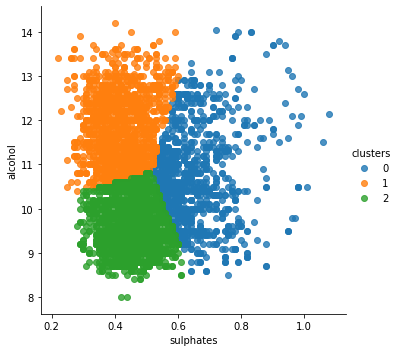

In [16]:
#scatter plot to viz the clusters 
sns.lmplot(fit_reg=False, x='sulphates', y='alcohol', data=wine, hue='clusters')

# DBSCAN

One of the limitations of K means is that the output data should be spherical for correct clustering 

In [17]:
df=pd.read_csv('moon_data.csv')

In [18]:
df.head()

,Unnamed: 0,X,Y
0,0,1.045255,0.332214
1,1,0.801944,-0.411547
2,2,-0.749356,0.775108
3,3,0.975674,0.191768
4,4,-0.512188,0.929997


In [19]:
#dropping unwanted column
df.drop(['Unnamed: 0'],axis='columns', inplace=True)
df.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


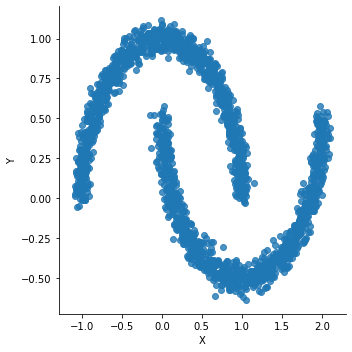

In [20]:
#checking the plot, we see that it is not spherical 
sns.lmplot(fit_reg=False, x='X', y='Y', data=df)

In [21]:
#fitting with kmeans and checking the performance
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

#adding the labels as a dataframe col
df['clusters'] = kmeans.labels_

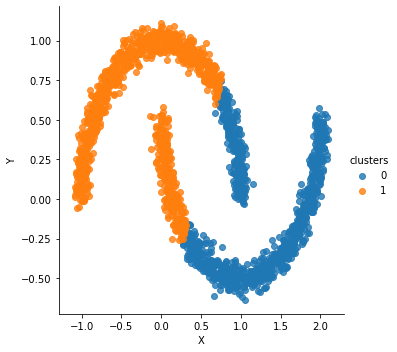

In [22]:
#plotting to see the clusters formed
sns.lmplot(fit_reg=False, x='X', y='Y', data=df, hue='clusters')

In [34]:
#checking silhouette_score for kmeans 
print(silhouette_score(df, kmeans.labels_))

0.4393900175161958


Now, we check the performance using DBSCAN

In [24]:
#dropping the labels again
df.drop(['clusters'], axis='columns', inplace=True)

In [25]:
df.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


In [26]:
#DBSCAN has 2 parameters, epsilon and min_samples
#epsilon controls the size of the neighbourhood and min_samples control the min number of points required to classify a point
#in a specific cluster 
db=DBSCAN(eps=0.1, min_samples=30, metric='euclidean')

In [27]:
db.fit(df)

DBSCAN(eps=0.1, min_samples=30)

In [28]:
#adding cluster as the output 
df['clusters'] = db.labels_

In [29]:
df.head()

,X,Y,clusters
0,1.045255,0.332214,1
1,0.801944,-0.411547,0
2,-0.749356,0.775108,1
3,0.975674,0.191768,1
4,-0.512188,0.929997,1


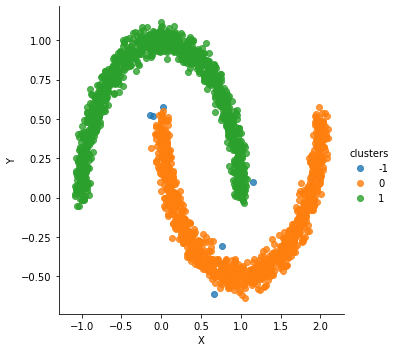

In [30]:
#viz to check the clustering 
sns.lmplot(fit_reg=False, x='X', y='Y', data=df, hue='clusters')

In [31]:
#2 clusters are formed denoted by 0 and 1 and -1 denotes the outliers that are not with any cluster
df['clusters'].value_counts()

 1    999
 0    995
-1      6
Name: clusters, dtype: int64

In [33]:
#checking the silhouette_score
print(silhouette_score(df, db.labels_))

0.4246829956692446


Silhouette score has dropped for DBSCAN but visually the clustering is better compared to Kmeans 